특성 이름: ['petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa', 'versicolor']
데이터 크기: (100, 2)
지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]


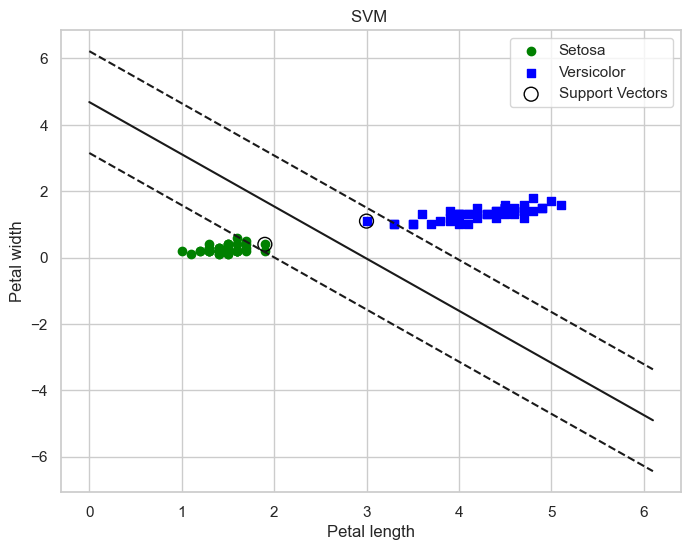

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# 1. 데이터 준비
# 데이터 로드
iris = load_iris()
X = iris['data'][:, 2:4]  # 꽃잎 길이(petal length)와 꽃잎 너비(petal width)
y = iris['target']

# Iris Setosa와 Iris Versicolor 클래스만 선택
data_filter = (y == 0) | (y == 1)
X = X[data_filter]
y = y[data_filter]

# 데이터 정보 출력
print("특성 이름:", ['petal length (cm)', 'petal width (cm)'])
print("타깃 이름:", ['setosa', 'versicolor'])
print("데이터 크기:", X.shape)

# 2. 모델 학습
# 선형 SVM 모델 정의
model = SVC(kernel="linear")
# 모델 학습
model.fit(X, y)
# 지원 벡터 출력
print("지원 벡터(Support Vectors):")
print(model.support_vectors_)

# 3. 결정 경계 시각화
# 결정 경계 계산 함수
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    
    # 데이터 산점도
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='green', label='Setosa')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='blue', marker='s', label='Versicolor')
    
    # 결정 경계 그리기
    x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x1 = -(model.coef_[0][0] * x0 + model.intercept_[0]) / model.coef_[0][1]
    plt.plot(x0, x1, "k-")
    
    # 마진 경계
    margin = 2 / np.sqrt(np.sum(model.coef_ ** 2))  # 마진을 기존보다 더 크게 설정
    x1_down = x1 - margin
    x1_up = x1 + margin
    plt.plot(x0, x1_down, "k--")
    plt.plot(x0, x1_up, "k--")
    
    # 지원 벡터 위치에 원 표시
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolors='none', edgecolors='black', s=100, label="Support Vectors")
    
    plt.title("SVM ")
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc='upper right')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X, y, model)
